## Librarry


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_are


## Parameter

In [2]:
# Parameter sistem
a = 0.1  # koefisien kehilangan panas
b = 0.5  # efisiensi pemanas
T_env = 25  # suhu lingkungan
T_target = 60  # suhu target

## Model state-space

In [3]:
A = np.array([[-a]])
B = np.array([[b]])
C = np.array([[1]])
D = np.array([[0]])

## Matriks Bobot LQR

In [4]:
Q = np.array([[10]])  # penalti kesalahan suhu
R = np.array([[1]])   # penalti besar kontrol (hemat daya)

## Solve Riccati quation


In [5]:
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

## Model Dinamik

In [6]:
def temp_dynamics(t, x):
    u = -K @ (x - (T_target - T_env))  # LQR control
    dxdt = A @ x + B @ u
    return dxdt.flatten()

## Simulasi Waktu

In [7]:
t_span = (0, 100)
x0 = np.array([10.0])  # suhu awal = 10 derajat di atas T_env (total 35)
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol = solve_ivp(temp_dynamics, t_span, x0, t_eval=t_eval)

T_result = sol.y[0] + T_env

## Plot Hasil

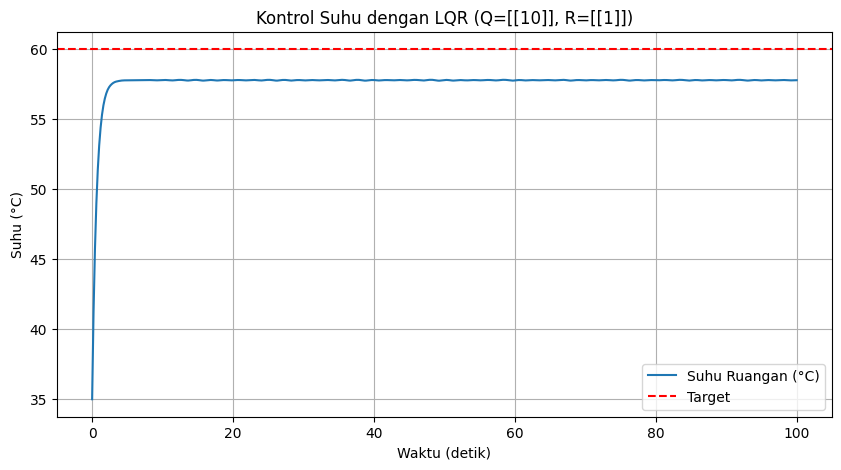

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(sol.t, T_result, label='Suhu Ruangan (°C)')
plt.axhline(y=T_target, color='r', linestyle='--', label='Target')
plt.xlabel('Waktu (detik)')
plt.ylabel('Suhu (°C)')
plt.title(f'Kontrol Suhu dengan LQR (Q={Q}, R={R})')
plt.grid(True)
plt.legend()
plt.show()

Gain LQR K = 9.802


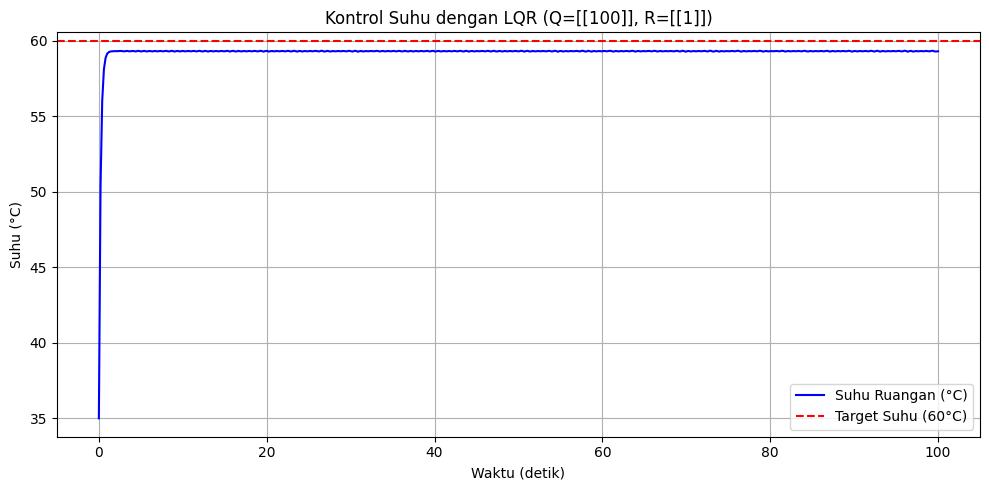

In [9]:
# ==== PARAMETER SISTEM ====
a = 0.1        # laju kehilangan panas
b = 0.5        # efisiensi heater
T_env = 25     # suhu lingkungan
T_target = 60  # suhu target

# ==== STATE-SPACE MODEL ====
A = np.array([[-a]])
B = np.array([[b]])

# ==== LQR SETUP ====
Q = np.array([[100]])   # prioritas besar pada error suhu
R = np.array([[1]])     # penalti sedang untuk daya kontrol

# Solusi Riccati dan gain LQR
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

print(f"Gain LQR K = {K[0,0]:.3f}")

# ==== SIMULASI DINAMIKA ====
def temperature_dynamics(t, x):
    x_target = T_target - T_env
    u = -K @ (x - x_target)        # kontrol LQR
    dxdt = A @ x + B @ u           # model suhu
    return dxdt.flatten()

# ==== KONDISI AWAL & WAKTU ====
x0 = np.array([10.0])  # suhu awal = 35°C (35 - 25)
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# ==== RUN SIMULASI ====
sol = solve_ivp(temperature_dynamics, t_span, x0, t_eval=t_eval)

# Konversi ke suhu aktual
T_result = sol.y[0] + T_env

# ==== PLOT HASIL ====
plt.figure(figsize=(10, 5))
plt.plot(sol.t, T_result, label='Suhu Ruangan (°C)', color='blue')
plt.axhline(y=T_target, color='red', linestyle='--', label='Target Suhu (60°C)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Suhu (°C)')
plt.title(f'Kontrol Suhu dengan LQR (Q={Q}, R={R})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Gain LQR K = 1.228


C:\Users\taufi\AppData\Local\Temp\ipykernel_21400\921467887.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u = float(-K @ (x - x_target))  # kontrol LQR


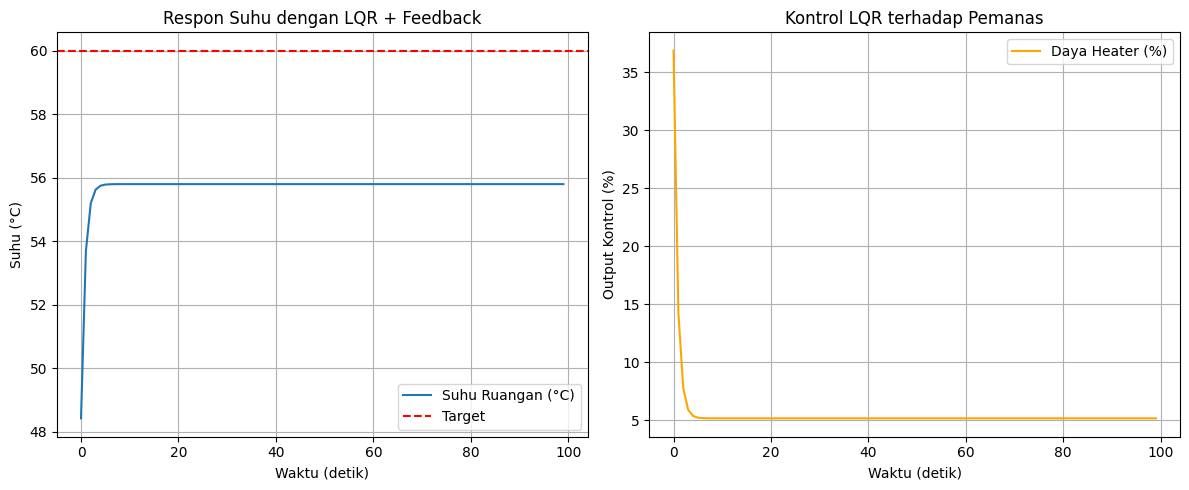

In [10]:
# === PARAMETER SISTEM ===
a = 0.1       # koefisien kehilangan panas
b = 0.5       # efisiensi pemanas
T_env = 30    # suhu lingkungan
T_target = 60 # suhu target

# === LQR SETUP ===
A = np.array([[-a]])
B = np.array([[b]])
Q = np.array([[100]])  # prioritas error
R = np.array([[50]])    # penalti kontrol

# Hitung gain LQR
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P
print(f"Gain LQR K = {K[0,0]:.3f}")

# === SIMULASI LOOP FEEDBACK ===
dt = 1.0            # waktu sampling (detik)
t_total = 100       # durasi simulasi
steps = int(t_total / dt)

# Inisialisasi variabel
T = 30.0            # suhu awal (35°C)
T_history = []
u_history = []
time_history = []

for step in range(steps):
    t = step * dt

    # 1. Hitung state (penyimpangan terhadap T_env)
    x = np.array([[T - T_env]])  # pastikan bentuknya array 2D (1x1)
    x_target = np.array([[T_target - T_env]])

    # 2. Hitung kontrol (umpan balik)
    u = float(-K @ (x - x_target))  # kontrol LQR
    u = max(0, min(u, 100))         # batas kontrol: 0 - 100%

    # 3. Update suhu berdasarkan model fisik diskrit
    dT = (-a * (T - T_env) + b * u) * dt
    T += dT

    # 4. Simpan data untuk plot
    T_history.append(T)
    u_history.append(u)
    time_history.append(t)

# === PLOT HASIL ===
plt.figure(figsize=(12, 5))

# Suhu
plt.subplot(1, 2, 1)
plt.plot(time_history, T_history, label="Suhu Ruangan (°C)")
plt.axhline(T_target, color='red', linestyle='--', label="Target")
plt.xlabel("Waktu (detik)")
plt.ylabel("Suhu (°C)")
plt.title("Respon Suhu dengan LQR + Feedback")
plt.grid(True)
plt.legend()

# Kontrol
plt.subplot(1, 2, 2)
plt.plot(time_history, u_history, label="Daya Heater (%)", color="orange")
plt.xlabel("Waktu (detik)")
plt.ylabel("Output Kontrol (%)")
plt.title("Kontrol LQR terhadap Pemanas")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()